## Problem Definition
Predict energy consumption based on environmental conditions using a suitable machine learning model.
The goal is to capture the relationship between temperature, humidity, and energy usage to provide accurate consumption forecasts.

##  Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('energy_consumption_data.csv')

In [3]:
df.head()

,temperature_celsius,humidity_percent,energy_consumption_kwh
0,14.981605,65.852937,235.918501
1,38.028572,52.887709,275.521978
2,29.279758,34.762209,225.805549
3,23.946339,75.103602,290.125248
4,6.240746,64.778494,206.997502


## Data Exploration & Preprocessing

In [4]:
df.describe()

,temperature_celsius,humidity_percent,energy_consumption_kwh
count,500.000000,500.000000,500.000000
mean,19.942468,48.556112,218.079331
std,11.947536,22.839477,62.483966
min,0.202463,10.370562,76.394423
25%,9.651188,28.327940,173.676088
50%,20.526550,47.745725,218.171484
75%,30.244995,68.106946,263.681392
max,39.718592,89.977414,368.992619


In [5]:
import matplotlib.pyplot as plt

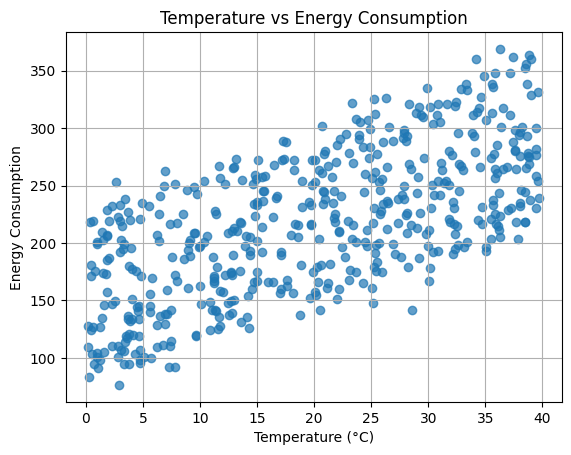

In [6]:
plt.scatter(df['temperature_celsius'], df['energy_consumption_kwh'], alpha=0.7)
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

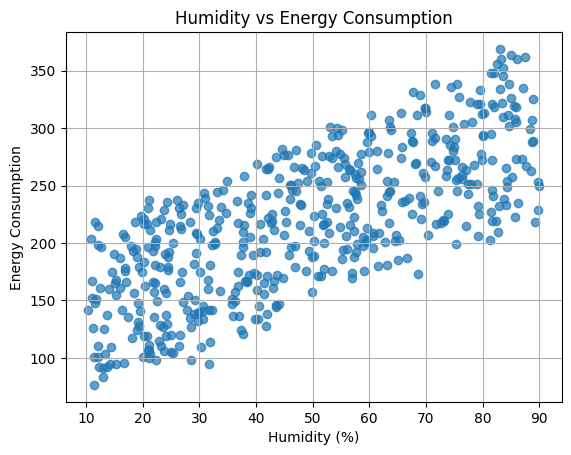

In [7]:
plt.scatter(df['humidity_percent'], df['energy_consumption_kwh'], alpha=0.7)
plt.title('Humidity vs Energy Consumption')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

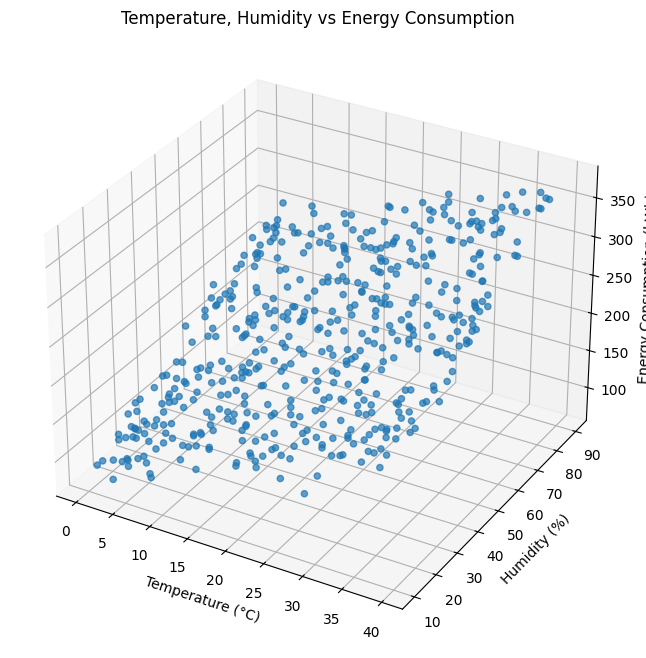

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['temperature_celsius'], df['humidity_percent'], df['energy_consumption_kwh'], alpha=0.7)

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Energy Consumption (kWh)')
ax.set_title('Temperature, Humidity vs Energy Consumption')

plt.show()


For a better 3d visualization, run `02_energy_consumption_prediction/visualize_3d.py`

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['temperature_celsius', 'humidity_percent']]
y = df['energy_consumption_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (400, 2)
y_train shape: (400,)
X_test shape: (100, 2)
y_test shape: (100,)


## Model Selection & Training

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.predict([[20, 50]])

array([221.24409973])

## Model Interpretation

$y = w_{1}x_{1} + w_{2}x_{2} + b$  

$\text{energy consumption} = w_1.\text{temperature} + w_2.\text{humidity} + b$

$w1$ -> co-efficient of temperature  
$w2$ -> co-efficient of humidity  
$b$ -> bias

In [14]:
model.coef_

array([3.40776992, 2.00135859])

In [15]:
model.intercept_

np.float64(53.02077169213487)

In [16]:
def predict_energy_consumption(temperature, humidity):
    return 3.40772114*temperature + 2.00133069*humidity + 53.02343025491177

In [17]:
predict_energy_consumption(20, 50)

221.24438755491178

Minimum energy consumption is 53 kWh  
For every 1 degree celsius rise in temperature the consumption increases by 3.4 kWh  
For every 1% rise in humidity the consumption increases by 2 kWh

## Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
rmse_train = mean_squared_error(y_train, model.predict(X_train))**0.5
rmse_test = mean_squared_error(y_test, model.predict(X_test))**0.5

print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")

RMSE for training set: 9.601678375568182
RMSE for test set: 10.503729780683086


## Model Deployment

The trained model can now be deployed through a **Streamlit application** to provide an interactive interface for energy consumption prediction.  
In the app, a user can input temperature and humidity values, and the underlying function will compute the predicted energy consumption based on our trained model.  

Refer to `02_energy_consumption_prediction/app.py` for the Streamlit application code.